Análisis

In [1]:
from google.colab import drive    #Montamos la unidad de Drive a este notebook para acceder a los archivos
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [2]:
ruta="/content/gdrive/MyDrive/Portafolio_Drive_Analisis_Google/"#Ruta de Carpetas con Archivos ZIPel canciller es popular en redes sociales, también su hija, conocida como Francesca Stafford.
#/content/gdrive/MyDrive/Portafolio_Drive_Analisis_Google/unzip

In [3]:
import pandas as pd
import numpy as np

In [4]:
a=ruta+'unzip/byke_clean.csv'

In [5]:
ds=pd.read_csv(a)

In [6]:
ds.drop(ds.columns[0],axis=1,inplace=True)

In [7]:
ds['diff_time'] = pd.to_datetime(ds.ended_at) - pd.to_datetime(ds.started_at) 

In [8]:
ds=ds[ds.diff_time>=pd.Timedelta(minutes = 1)]

In [9]:
ds.drop('date',axis=1,inplace=True)

In [10]:
ds.drop('level_0',axis=1,inplace=True)

In [11]:
ds.reset_index(inplace=True)

In [12]:
ds.drop('level_0',axis=1,inplace=True)

In [13]:
ds.drop('index',axis=1,inplace=True)

In [14]:
ds.started_at = pd.to_datetime(ds.started_at)
ds.ended_at   = pd.to_datetime(ds.ended_at)

In [15]:
ds['hour']=ds.started_at.apply(lambda x: x.hour)

In [16]:
ds['day']=ds.started_at.apply(lambda x: x.date().weekday())

In [17]:
ds['month']=ds.started_at.apply(lambda x: x.month)

In [18]:
ds['day_of_month']=ds.started_at.apply(lambda x: x.date().day)

In [19]:
ds['id']=range(ds.shape[0])

In [20]:
colim=['rideable_type','start_station_name','start_station_id','end_station_name','end_station_id',\
    'member_casual','month','hour','diff_time','day']

ds[colim].head(4)

,rideable_type,start_station_name,start_station_id,end_station_name,end_station_id,member_casual,month,hour,diff_time,day
0,classic_bike,Orleans St & Elm St,TA1306000006,Orleans St & Elm St,TA1306000006,member,6,7,0 days 00:16:16,4
1,classic_bike,Desplaines St & Kinzie St,TA1306000003,Kingsbury St & Kinzie St,KA1503000043,member,6,8,0 days 00:02:01,2
2,classic_bike,Clark St & Grace St,TA1307000127,Clark St & Leland Ave,TA1309000014,member,6,12,0 days 00:07:47,6
3,classic_bike,Kingsbury St & Kinzie St,KA1503000043,Desplaines St & Kinzie St,TA1306000003,member,6,12,0 days 00:02:38,1


Pivot Tables

In [21]:
#                       4667226
stadis=pd.pivot_table(ds.iloc[:4667226,:],values='rideable_type',index=['member_casual',],\
               columns=['hour'],aggfunc='count')

In [22]:
x=stadis.iloc[:,:].columns
y=stadis.iloc[:,:].values

In [23]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Casual')

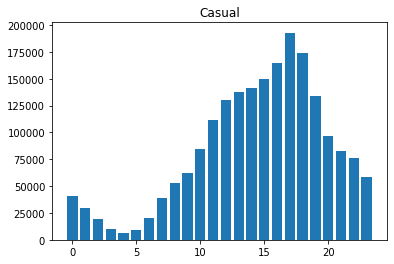

In [24]:
plt.bar(x,y[0])#casual
plt.title('Casual')

Text(0.5, 1.0, 'Member')

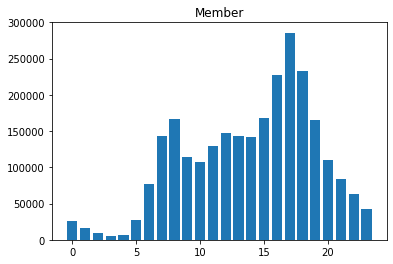

In [25]:
plt.bar(x,y[1])
plt.title('Member')

In [26]:
#table = pd.pivot_table(df, values='D', index=['A', 'B'],
#                    columns=['C'], aggfunc=np.sum)

In [27]:
stadis1=pd.pivot_table(ds.iloc[:4667226,:],values='rideable_type',index=['member_casual',],\
               columns=['day'],aggfunc='count')

In [28]:
x1=stadis1.iloc[:,:].columns
y1=stadis1.iloc[:,:].values

Text(0.5, 1.0, 'Casual')

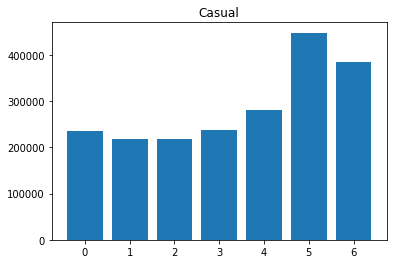

In [29]:
plt.bar(x1,y1[0])#casual
plt.title('Casual')

Text(0.5, 1.0, 'Member')

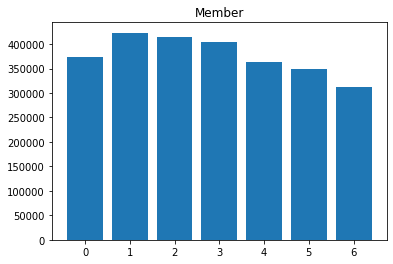

In [30]:
plt.bar(x1,y1[1])#casual
plt.title('Member')

In [31]:
stadis3=pd.pivot_table(ds.iloc[:4667226,:],values='rideable_type',index=['member_casual',],\
               columns=['month'],aggfunc='count')

In [32]:
stadis3

month,1,2,3,4,5,6,7,8,9,10,11,12
member_casual,,,,,,,,,,,,
casual,12481,14973,66409,90816,216938,330137,365513,338138,290079,187324,69287,44684
member,66575,72683,146497,177723,277162,334484,317690,327946,323287,284140,182939,129321


In [33]:
x3=stadis3.columns.values
y3=stadis3.values

Text(0.5, 1.0, 'casual')

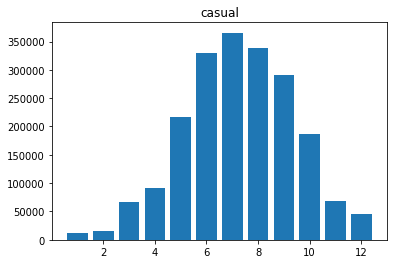

In [34]:
plt.bar(x3,y3[0])
plt.title('casual')

Text(0.5, 1.0, 'member')

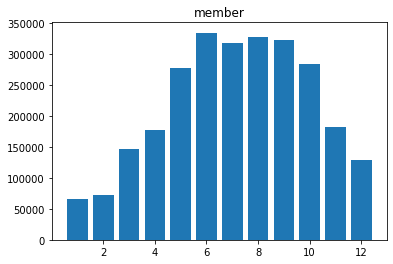

In [35]:
plt.bar(x3,y3[1])
plt.title('member')

In [36]:
# 21 Marzo      21 Junio
# 21 Junio      23 Septiembre
# 23 Septiembre 21 Diciembre
# 21 Diciembre  21 Marzo

In [37]:
#pd.timedelta_range('2021-06-01',)

# pd.to_datetime('2022-03-21'),pd.to_datetime('2022-06-21')#Primavera
# pd.to_datetime('2021-06-21'),pd.to_datetime('2021-09-23')#Verano
# pd.to_datetime('2021-09-23'),pd.to_datetime('2021-12-21')#Otoño
# pd.to_datetime('2021-12-21'),pd.to_datetime('2022-03-21')#Invierno

In [38]:
#Analizar tendencias, de que lugares a q lugares son los más concurrido o hay más demanda ?
#¿Adónde van los ciclistas de Divvy Bikeshare? ¿Cuándo cabalgan? ¿Qué tan lejos van? 
#¿Qué estaciones son las más populares? ¿En qué días de la semana se realizan la mayoría de los viajes?
#Agrega información meteorologica de cada día, luego cuenta el No de rodadas segun la temperatura, es relevante ?
#Demanda por hora, cuantos viajes se hacen en cada hora por las 10 estaciones más concurridas.

#Vemos cual estacion tiene más salidas, Vemos cual estacion tiene mas llegadas
#Vemos cual estacion tiene menos salidas, Vemos cual estacion tiene menos llegadas

#De la que tenga más salidas contamos cuantas salidas hay por hora, y cuantas llegadas tiene.
#Esto con el fin de mantener siempre disponibilidad en bicis.

#Si una estacion tiene 10 salidas y 1 llegada, va a hacer falta 9 bicis si la demanda sigue igual
#Si una estacion tiene 10 llegadas y 1 salida, entonces sobran 9 bicis que no se estan usando.
#salidas=polinomial
#excedente = Nodebicis - salidas(hora) + llegadas(hora)
#Quieres que el excedente sea cero, entonces Nodebicis=Salidas(hora)-llegadas(hora)
#Puedes calcular cuantas bicis necesitas tener para cada hora


#Para esto puedes calcular la media de cada hora de todos los lunes de un determinado mes, o conjunto de meses, temporada,
#Para esto sugiero dividir los datos en cuartiles, pero donde se acomoda la misma cantidad de datos en cada region
#Dividir en cuartiles significa ordenar de menor a mayor por fechas y agrupar en la misma cantidad de datos, es decir en
#El primer cuartil puede haber tantos meses como para alcanzar un cuartil superior. Cada cuartil tiene la misma cantidad de datos.
#Estamos diciendo que si en junio y julio (Verano) tiene demanda increiblemente alta, estas obligando a que queden juntos
#Los que tienen temporada alta con alta y baja con baja. Ahora si calculas la media de cada hora de cada dia, de cada cuartil.
#Esto te dara el valor medio de salidas y entradas de cada hora.  y con la formula anterior, sabras cuantas bicis debes agregar o quitar.

#En las estaciones con más demanda ver cuantas salidas tienen durante cada hora, por ejemplo de 8-9 hay 10 salidas
#Ahora antes de que se llegue a esa hora se debe garantizar que se cubrira esa demanda, para lo que puedes,
#LLevar bicis de una zona de baja demanda, a una zonda de alta demanda antes de las horas pico.

In [39]:
#ds.start_station_name.unique()#No importa si es member o casual
pd.pivot_table(ds.iloc[:4667226,:],values='member_casual',index=None,  \
               columns=['start_station_name'],aggfunc='count').transpose().sort_values('member_casual',ascending=False).head(5)

,member_casual
start_station_name,
Streeter Dr & Grand Ave,80415
Michigan Ave & Oak St,43793
Wells St & Concord Ln,41389
Clark St & Elm St,38889
Millennium Park,38888


In [40]:
#ds.start_station_name.unique()#No importa si es member o casual
pd.pivot_table(ds.iloc[:4667226,:],values='member_casual',index=None,  \
               columns=['end_station_name'],aggfunc='count').transpose().sort_values('member_casual',ascending=False).head(5)

,member_casual
end_station_name,
Streeter Dr & Grand Ave,83127
Michigan Ave & Oak St,44629
Wells St & Concord Ln,42042
Millennium Park,40377
Clark St & Elm St,37768


In [41]:
pd.pivot_table(ds.loc[  (ds.start_station_name=='Streeter Dr & Grand Ave') & (ds.month==7) ,\
                      ['rideable_type','member_casual','diff_time','hour','day','id'] ],\
              values=['id'],index=['day'],columns=['hour'],aggfunc='count',fill_value=0)
#No de bicicletas necesitadas para julio segun la hora y el día de la semana en la estacion streeter Dr 6 Grand Ave
#Puedes traer más datos de otros años y calcular la demanda del siguiente año 
#Si tienes suerte será una tendencia lineal y podras pronosticarla con regresion lineal 
#Aún debes saber que porcentaje de estas le pertenece a bici normal, elecctrica y otra. 
#Lo que haría es ver el porcentaje global es decir cuantas bicis si el 60% fue normal
#30% electrica y 10% otra entonces multiplicaria eso por el numero para saber cuanto de 
#CAda uno necesito.  

#En zonas poco transitadas promover los viajes dando viajes gratis o al minimo costo, Tambien
#En horas pico promover viajes grátis de lugares con poca demanda a lugares con mucha demanda

#Vamos a hacer un kmeans para 1 para datos que son memebers y otro para casual
#Una ves identificando las medias de cada cluster, podemos aplicar k-neigrest neigborhs
#para identificar los que son, los posibles y los que no son miembros
#Esto nos puede decir a quien darle propuestas, si bien no tenemos un identificador personal
#Podemos aplicar esto sobre alguna tendencia en estaciones, por ejemplo si los members Van de una estacion a otra
#Y ciclistas que ocupan la misma ruta, podrían ser potencialmente miembros si no lo son

id                                     ...                           \
hour  0   1   2   3  4  5   6   7   8    9   ...   14   15   16   17   18   
day                                          ...                            
0     16   5   7   1  0  6  14  43  59   61  ...  391  354  360  333  338   
1      8   7   4   0  0  1  19  57  60   50  ...  274  290  270  321  330   
2      0   5   3   0  2  7  18  58  37   43  ...  238  290  219  318  286   
3     14   9   2   1  0  1  22  28  39   38  ...  307  277  341  324  295   
4      8   7   3   4  0  1  23  48  76   58  ...  396  359  443  381  363   
5     36  15  10   5  0  7  22  29  83  198  ...  765  969  767  555  538   
6     56  30   8  11  4  6  17  29  64  116  ...  539  555  517  523  463   

                               
hour   19   20   21   22   23  
day                            
0     296  257  190   58   16  
1     256  211   74   43   14  
2     243  206  252  101   25  
3     262  146  133   60   22  
4     304  230  169  126   76  
5     463  352  327  381  121  
6     412  356  270  102   39  

[7 rows x 24 columns]

In [42]:
ds.loc[  (ds.start_station_name=='Streeter Dr & Grand Ave') & (ds.month==7) & (ds.day==6),\
                      ['rideable_type','member_casual','diff_time','hour','day','id','started_at','day_of_month'] ].day_of_month.unique()

array([ 4, 18, 11, 25, 10,  3, 31, 17, 24])

In [43]:
dff=pd.DataFrame({'col1':['m','m','c','c','z','m'],'col2':['1','1','1','2','2','3']})
dff

,col1,col2
0,m,1
1,m,1
2,c,1
3,c,2
4,z,2
5,m,3


In [44]:
#ds.start_station_name.unique()
pd.pivot_table(dff.iloc[:,:],values='col1',index=None,  \
               columns=['col2'],aggfunc='count')#.transpose().sort_values('member_casual',ascending=False)

col2,1,2,3
col1,3,2,1
